# KRAS Mutation Trans Effect on Transcriptomics

This notebook analyzes the trans effect of KRAS mutation on interacting and other proteins Transcriptomics, in Endometrial and Colon cancer.

### Library Imports

In [7]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al

en = cptac.Endometrial()
co = cptac.Colon()

Checking that index is up-to-date...Loading acetylproteomics data...Loading clinical data...Loading CNA data...Loading definitions data...Loading miRNA data...Loading phosphoproteomics_gene data...Loading phosphoproteomics_site data...Loading proteomics data...Loading somatic_binary data...Loading somatic data...Loading transcriptomics_circular data...Loading transcriptomics_linear data...Formatting dataframes...Checking that index is up-to-date...Loading clinical data...Loading miRNA data...Loading mutation_binary data...Loading mutation data...Loading phosphoproteomics_normal data...Loading phosphoproteomics_tumor data...Loading proteomics_normal data...Loading proteomics_tumor data...Loading transcriptomics data...Formatting dataframes...

### Investigate KRAS gene

In [2]:
gene = "KRAS"

### Investigate Proteomics, Phosphoproteomics, Acetylproteomics, or Transcriptomics

In [3]:
#omics = "proteomics"
omics = "transcriptomics"
#omics = "phosphoproteomics"
#omics = "acetylproteomics"

# Interacting Proteins: Transcriptomics

## Endometrial

### Generate interacting protein list

In [4]:
'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

omics_object = en.get_proteomics()

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics == 'phosphoproteomics' or omics == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics_object.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins_in_omics_df:
    print(interacting_protein)

Generating interacting protein list
Interacting Proteins:
RAF1
MAPK1
KRAS
MAP2K2
MAPK3
PIK3CA
ERBB3
ERBB2
EGFR
BRAF
PIK3CB
ARAF
MAP2K1
PTPN11
NF1
PIK3CG
NRAS
SRC
GRB2
SOS1
HRAS
CDKN2A
RAP1GDS1
HNRNPC
RASSF2
RASSF5


### Test for significant comparisons in any of interacting proteins

In [5]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)


'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")

Doing t-test comparisons

No significant comparisons.


## Colon

### Generate interacting protein list

In [10]:
'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

omics_object = co.get_proteomics()

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics == 'phosphoproteomics' or omics == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics_object.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins_in_omics_df:
    print(interacting_protein)

Generating interacting protein list
Interacting Proteins:
RAF1
MAPK1
KRAS
MAP2K2
MAPK3
PIK3CA
ERBB3
ERBB2
EGFR
BRAF
PIK3CB
ARAF
MAP2K1
PTPN11
NF1
NRAS
SRC
GRB2
SOS1
HRAS
CDKN2A
RAP1GDS1
HNRNPC
RASSF2
RASSF5


### Test for significant comparisons in any of interacting proteins

In [11]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")

Doing t-test comparisons

No significant comparisons.


# All Proteins: Transcriptomics

## Endometrial

In [14]:
try:
    print("\nGene: ", gene)

    '''Use all proteins'''
    proteomics = en.get_proteomics()
    all_proteins = proteomics.columns
    #all_proteins = all_proteins[:100]

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=all_proteins)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  KRAS
MT-ATP6 did not match any columns in transcriptomics dataframe. MT-ATP6_transcriptomics column inserted, but filled with NaN.
MT-ATP8 did not match any columns in transcriptomics dataframe. MT-ATP8_transcriptomics column inserted, but filled with NaN.
MT-CO1 did not match any columns in transcriptomics dataframe. MT-CO1_transcriptomics column inserted, but filled with NaN.
MT-CO2 did not match any columns in transcriptomics dataframe. MT-CO2_transcriptomics column inserted, but filled with NaN.
MT-CO3 did not match any columns in transcriptomics dataframe. MT-CO3_transcriptomics column inserted, but filled with NaN.
MT-CYB did not match any columns in transcriptomics dataframe. MT-CYB_transcriptomics column inserted, but filled with NaN.
MT-ND1 did not match any columns in transcriptomics dataframe. MT-ND1_transcriptomics column inserted, but filled with NaN.
MT-ND2 did not match any columns in transcriptomics dataframe. MT-ND2_transcriptomics column inserted, but filled w

## Colon

In [15]:
try:
    print("\nGene: ", gene)

    '''Use all proteins'''
    proteomics = co.get_proteomics()
    all_proteins = proteomics.columns
    #all_proteins = all_proteins[:100]

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=all_proteins)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  KRAS
A1BG did not match any columns in transcriptomics dataframe. A1BG_transcriptomics column inserted, but filled with NaN.
ABCA8 did not match any columns in transcriptomics dataframe. ABCA8_transcriptomics column inserted, but filled with NaN.
ACAN did not match any columns in transcriptomics dataframe. ACAN_transcriptomics column inserted, but filled with NaN.
ACTA1 did not match any columns in transcriptomics dataframe. ACTA1_transcriptomics column inserted, but filled with NaN.
ACTBL2 did not match any columns in transcriptomics dataframe. ACTBL2_transcriptomics column inserted, but filled with NaN.
ACTL8 did not match any columns in transcriptomics dataframe. ACTL8_transcriptomics column inserted, but filled with NaN.
ACTN2 did not match any columns in transcriptomics dataframe. ACTN2_transcriptomics column inserted, but filled with NaN.
ACTN3 did not match any columns in transcriptomics dataframe. ACTN3_transcriptomics column inserted, but filled with NaN.
ADAMTS16 did 

CTNNA3 did not match any columns in transcriptomics dataframe. CTNNA3_transcriptomics column inserted, but filled with NaN.
CTRB2 did not match any columns in transcriptomics dataframe. CTRB2_transcriptomics column inserted, but filled with NaN.
CTRC did not match any columns in transcriptomics dataframe. CTRC_transcriptomics column inserted, but filled with NaN.
CYLC2 did not match any columns in transcriptomics dataframe. CYLC2_transcriptomics column inserted, but filled with NaN.
CYP3A4 did not match any columns in transcriptomics dataframe. CYP3A4_transcriptomics column inserted, but filled with NaN.
CYP4F8 did not match any columns in transcriptomics dataframe. CYP4F8_transcriptomics column inserted, but filled with NaN.
CYS1 did not match any columns in transcriptomics dataframe. CYS1_transcriptomics column inserted, but filled with NaN.
DAPL1 did not match any columns in transcriptomics dataframe. DAPL1_transcriptomics column inserted, but filled with NaN.
DCLK1 did not match an

KRT14 did not match any columns in transcriptomics dataframe. KRT14_transcriptomics column inserted, but filled with NaN.
KRT16 did not match any columns in transcriptomics dataframe. KRT16_transcriptomics column inserted, but filled with NaN.
KRT2 did not match any columns in transcriptomics dataframe. KRT2_transcriptomics column inserted, but filled with NaN.
KRT3 did not match any columns in transcriptomics dataframe. KRT3_transcriptomics column inserted, but filled with NaN.
KRT31 did not match any columns in transcriptomics dataframe. KRT31_transcriptomics column inserted, but filled with NaN.
KRT34 did not match any columns in transcriptomics dataframe. KRT34_transcriptomics column inserted, but filled with NaN.
KRT36 did not match any columns in transcriptomics dataframe. KRT36_transcriptomics column inserted, but filled with NaN.
KRT5 did not match any columns in transcriptomics dataframe. KRT5_transcriptomics column inserted, but filled with NaN.
KRT6A did not match any column

RPL3L did not match any columns in transcriptomics dataframe. RPL3L_transcriptomics column inserted, but filled with NaN.
RPS4Y1 did not match any columns in transcriptomics dataframe. RPS4Y1_transcriptomics column inserted, but filled with NaN.
RPS4Y2 did not match any columns in transcriptomics dataframe. RPS4Y2_transcriptomics column inserted, but filled with NaN.
RTN1 did not match any columns in transcriptomics dataframe. RTN1_transcriptomics column inserted, but filled with NaN.
S100A7 did not match any columns in transcriptomics dataframe. S100A7_transcriptomics column inserted, but filled with NaN.
SAA2-SAA4 did not match any columns in transcriptomics dataframe. SAA2-SAA4_transcriptomics column inserted, but filled with NaN.
SARDH did not match any columns in transcriptomics dataframe. SARDH_transcriptomics column inserted, but filled with NaN.
SCGN did not match any columns in transcriptomics dataframe. SCGN_transcriptomics column inserted, but filled with NaN.
SCN7A did not 

### TODO: Explore SPRY1, GALNT10, TGFBI, LY6E, and PHLDA1 Transcriptomics

## SPRY1 Transcriptomics: Endometrial

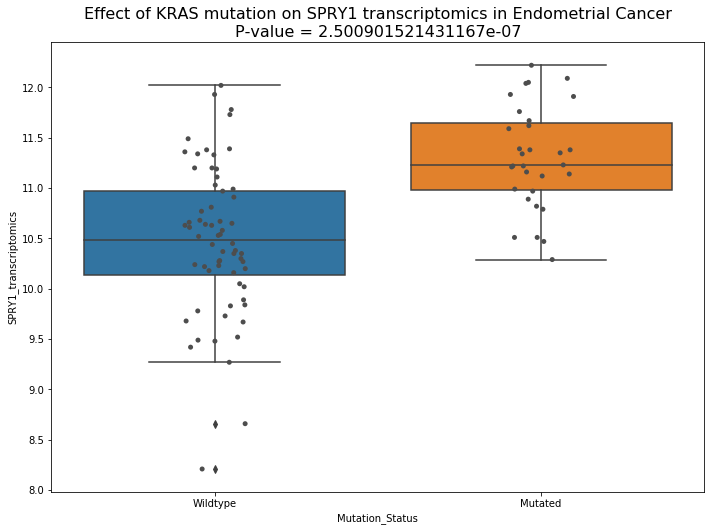

In [8]:
#Endometrial
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["SPRY1"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['SPRY1_transcriptomics'], wtdf['SPRY1_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'SPRY1_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'SPRY1_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on SPRY1 transcriptomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## SPRY1 Transcriptomics: Colon

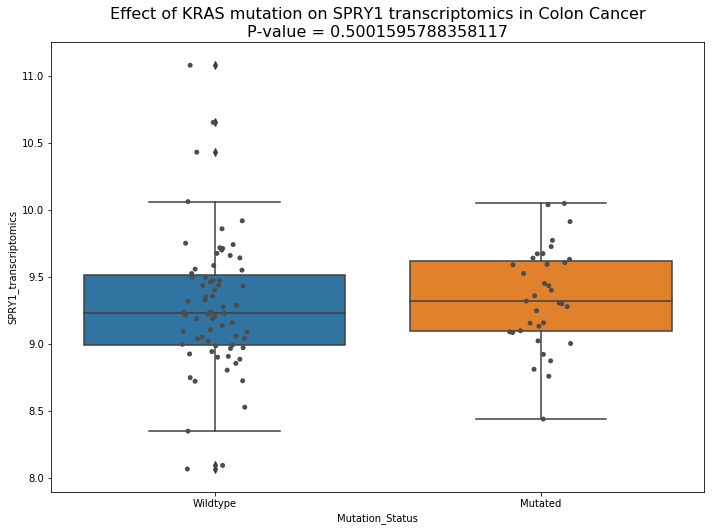

In [16]:
#Endometrial
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["SPRY1"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['SPRY1_transcriptomics'], wtdf['SPRY1_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'SPRY1_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'SPRY1_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on SPRY1 transcriptomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## GALNT10 Transcriptomics: Colon

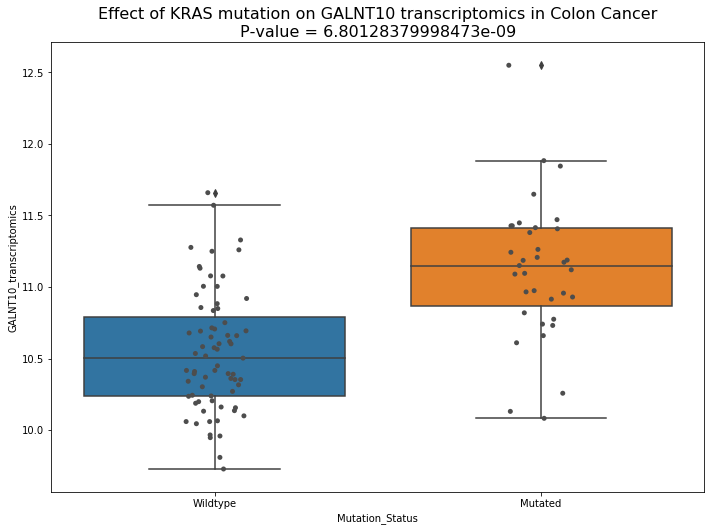

In [17]:
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["GALNT10"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['GALNT10_transcriptomics'], wtdf['GALNT10_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'GALNT10_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'GALNT10_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on GALNT10 transcriptomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## GALNT10 Transcriptomics: Endometrial

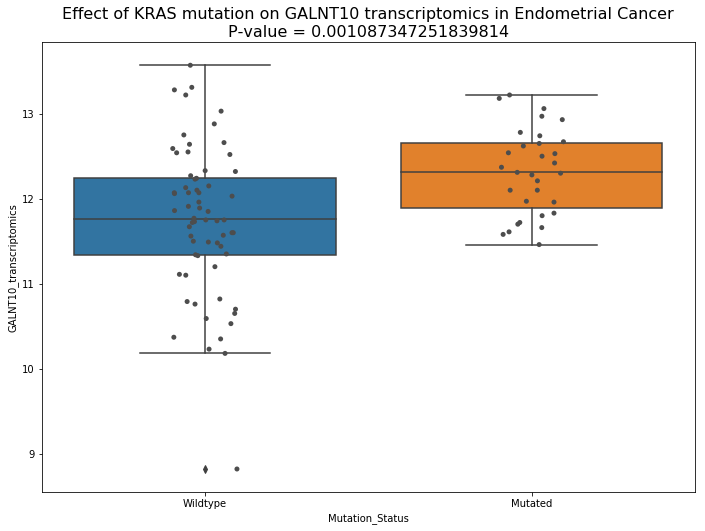

In [18]:
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["GALNT10"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['GALNT10_transcriptomics'], wtdf['GALNT10_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'GALNT10_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'GALNT10_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on GALNT10 transcriptomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## TGFBI Transcriptomics: Colon

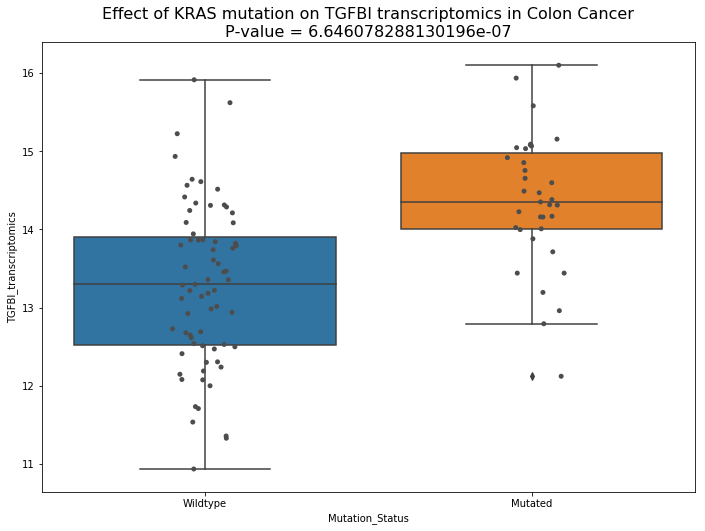

In [19]:
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["TGFBI"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['TGFBI_transcriptomics'], wtdf['TGFBI_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'TGFBI_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'TGFBI_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on TGFBI transcriptomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## TGFBI Transcriptomics: Endometrial

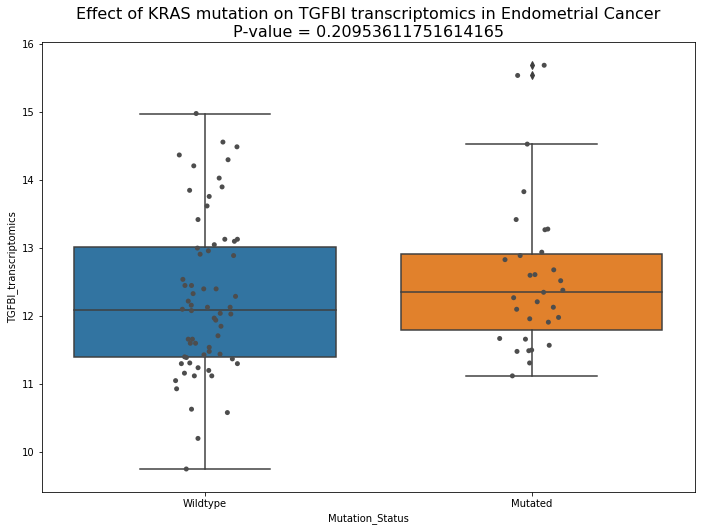

In [20]:
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["TGFBI"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['TGFBI_transcriptomics'], wtdf['TGFBI_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'TGFBI_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'TGFBI_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on TGFBI transcriptomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## LY6E Transcriptomics: Colon

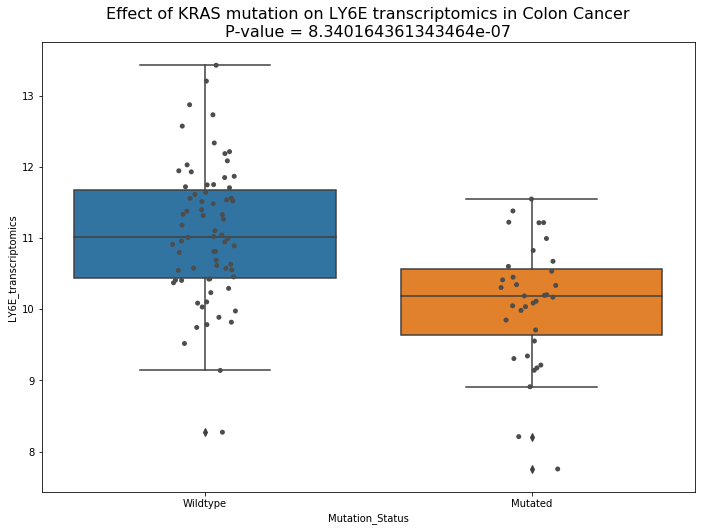

In [21]:
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["LY6E"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['LY6E_transcriptomics'], wtdf['LY6E_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'LY6E_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'LY6E_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on LY6E transcriptomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## LY6# Transcriptomics: Endometrial

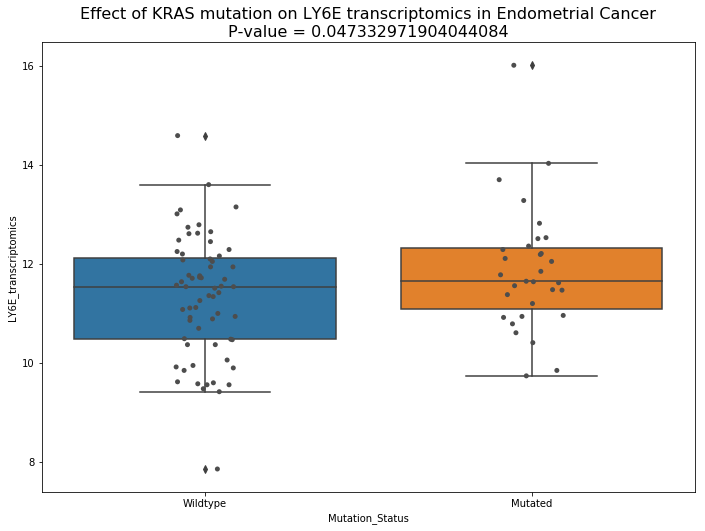

In [22]:
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["LY6E"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['LY6E_transcriptomics'], wtdf['LY6E_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'LY6E_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'LY6E_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on LY6E transcriptomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## PHLDA1 Transcriptomics: Colon

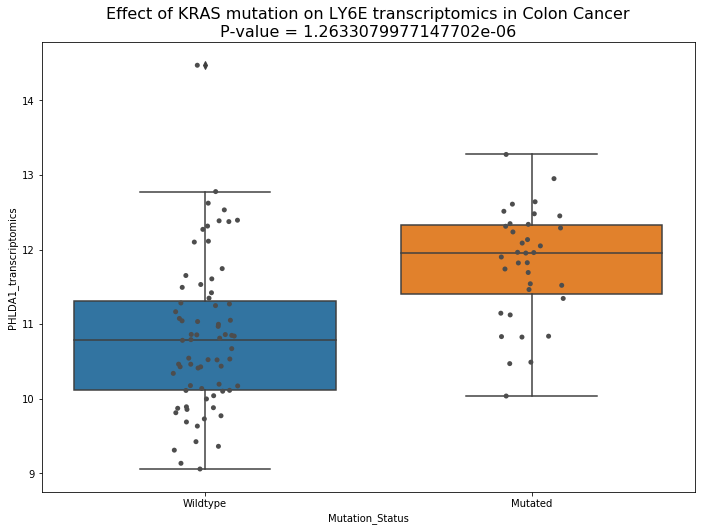

In [23]:
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["PHLDA1"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['PHLDA1_transcriptomics'], wtdf['PHLDA1_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'PHLDA1_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'PHLDA1_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on LY6E transcriptomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## PHLDA1 Transcriptomics: Endometrial

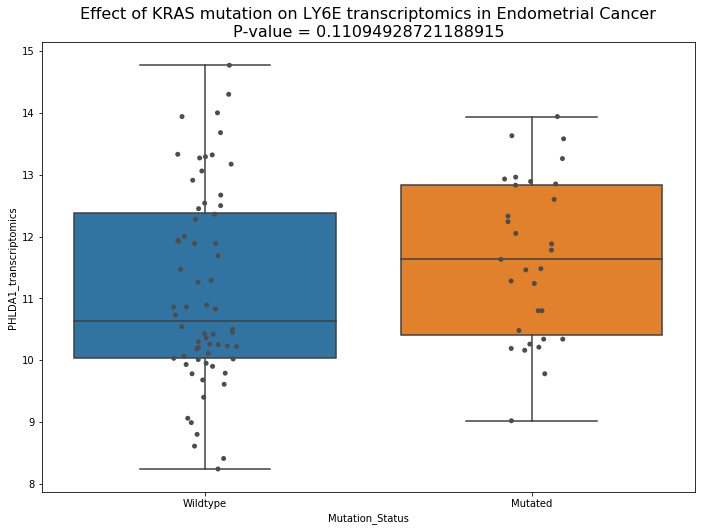

In [24]:
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["PHLDA1"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

protdf.head()

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['PHLDA1_transcriptomics'], wtdf['PHLDA1_transcriptomics'])


for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'PHLDA1_transcriptomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'PHLDA1_transcriptomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on LY6E transcriptomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()
#print("P-Value = ", pval)

## Conclusions

SPRY1 was the only protein whose transcriptomics were significantly altered by KRAS mutation in Endometrial Cancer. GALNT10, TGFBI, LY6E, and PHLDA1 transcriptomics were all significantly altered by KRAS mutation in Colon Cancer.